In [1]:
import os
import sys
import matplotlib.pyplot as plt

# Add the local src directory to the path
sys.path.append('./gbapy/')

# Load the GBA_model class
from GbaModel import *

In [2]:

model = read_csv_model("./examples/toy_models/D")

In [3]:
model.clear_all_trajectories()
model.read_LP_from_csv()
model.compute_optimums(max_time=10000, initial_dt = 0.01)

### EGD mu, v , c , p in one plot

### PLOT EGD for condition 1, p,v,c

In [11]:
model.MC_tracker

,label,condition,t,mu,fixed,rxn1.v,rxn2.v,rxn3.v,rxn4.v,Ribosome.v
0,1,1,0.0,0.904076,0,195.804775,111.581057,0.0,235.150162,284.331895


> Condition 1: MAXITER reached
> MC simulation: maximum iterations reached (condition=1,	mu=0.54321,	nb iterations=10000,	nb fixed=1).
> Condition 1: MAXITER reached
> MC simulation: maximum iterations reached (condition=1,	mu=0.90408,	nb iterations=1000,	nb fixed=0).


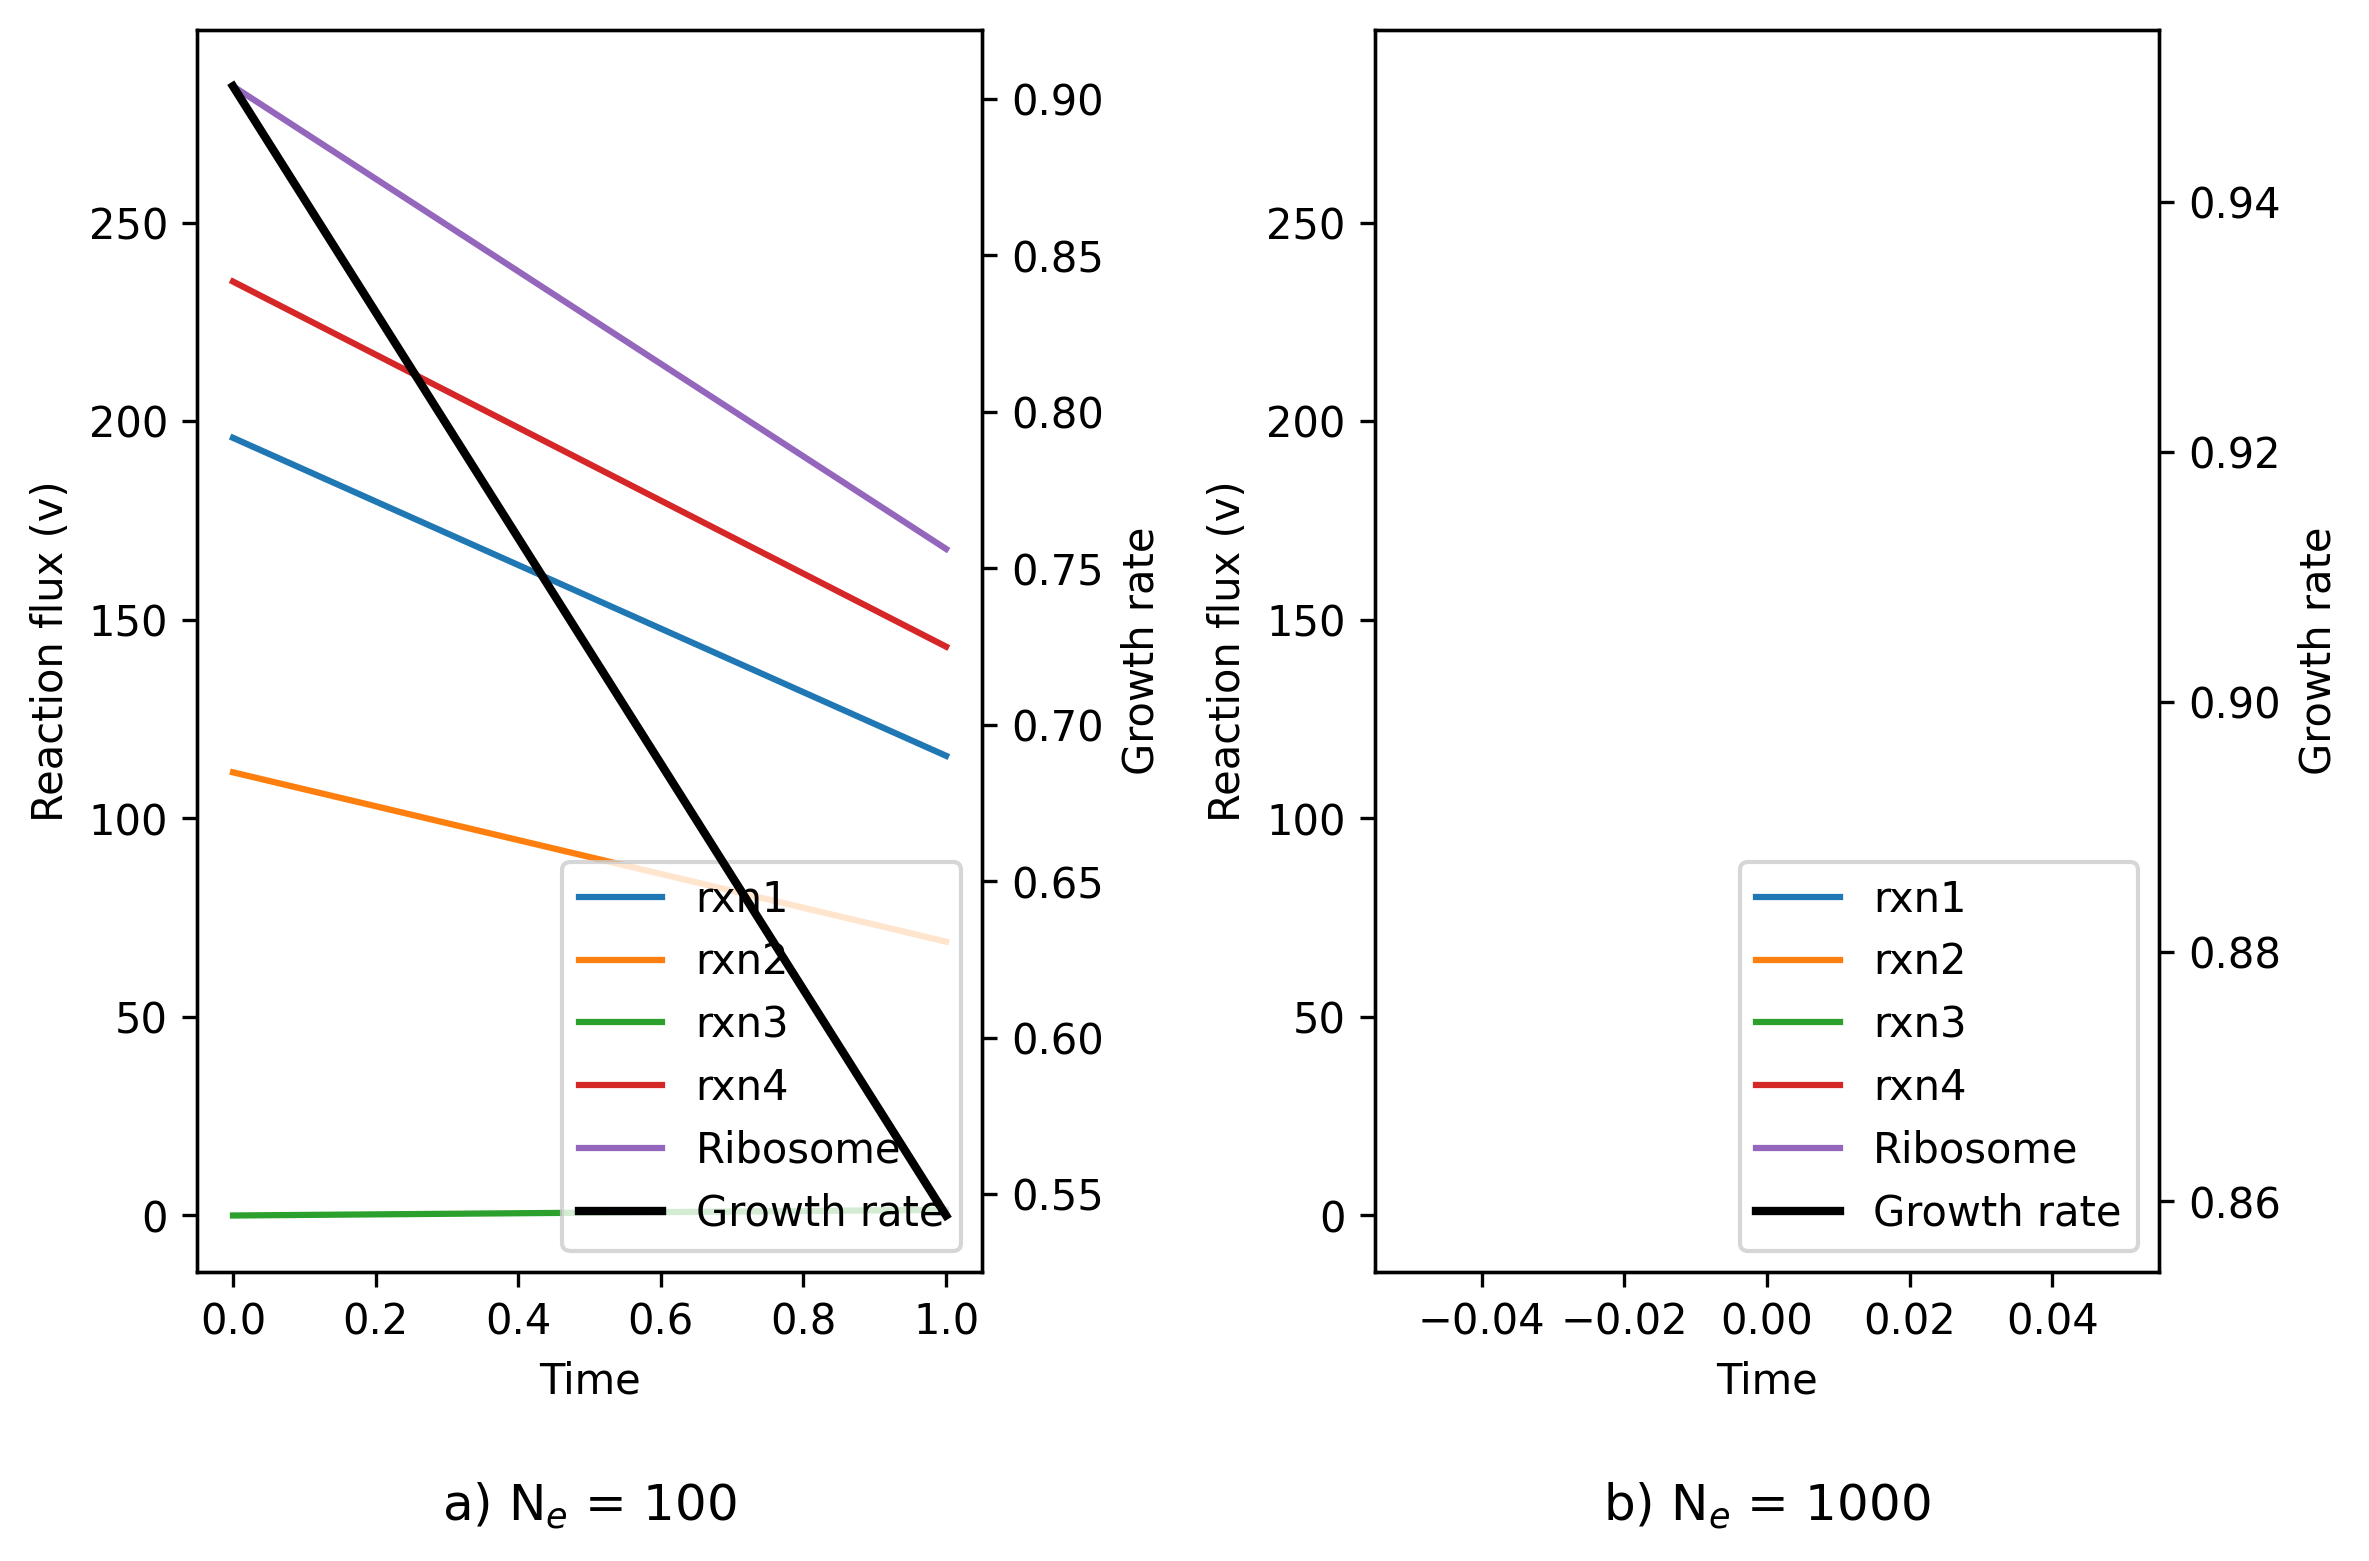

In [7]:
import matplotlib.pyplot as plt

# First simulation: N_e = 100
model.clear_all_trajectories()
model.set_f0(model.LP_solution)
model.MC_simulation(condition="1", max_iter=10000, sigma=0.001, N_e=100, track=True, saved_values=['v'], label=1)

# Extract data for N_e = 100
DfluxCon1_Ne100 = model.MC_tracker[["rxn1.v", "rxn2.v", "rxn3.v", "rxn4.v", "Ribosome.v"]]
time_Ne100 = model.MC_tracker["t"]
growthrate_Ne100 = model.MC_tracker["mu"]

# Second simulation: N_e = 1000
model.clear_all_trajectories()
model.set_f0(model.LP_solution)
model.MC_simulation(condition="1", max_iter=1000, sigma=0.001, N_e=1000, track=True, saved_values=['v'], label=1)

# Extract data for N_e = 1000
DfluxCon1_Ne1000 = model.MC_tracker[["rxn1.v", "rxn2.v", "rxn3.v", "rxn4.v", "Ribosome.v"]]
time_Ne1000 = model.MC_tracker["t"]
growthrate_Ne1000 = model.MC_tracker["mu"]

# Create the figure and subplots for the reaction fluxes and growth rates
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), dpi=300)  # 1 row, 2 columns

# First subplot (N_e = 100)
for column in DfluxCon1_Ne100:
    label = column.replace('.v', '')  # Remove ".v" from labels
    ax1.plot(time_Ne100, DfluxCon1_Ne100[column], label=label)

# Set labels for primary axis (reaction fluxes)
ax1.set_xlabel('Time')
ax1.set_ylabel('Reaction flux (v)')

# Create a secondary y-axis for growth rate on the first subplot
ax3 = ax1.twinx()
ax3.plot(time_Ne100, growthrate_Ne100, label='Growth rate', color='black', linewidth=2)
ax3.set_ylabel('Growth rate', color='black')

# Combine legends for the first subplot
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax3.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower right')

# Label for the first subplot
ax1.text(0.5, -0.2, 'a) N$_e$ = 100', transform=ax1.transAxes, fontsize=12, ha='center')

# Second subplot (N_e = 1000)
for column in DfluxCon1_Ne1000:
    label = column.replace('.v', '')  # Remove ".v" from labels
    ax2.plot(time_Ne1000, DfluxCon1_Ne1000[column], label=label)

# Set labels for the second subplot
ax2.set_xlabel('Time')
ax2.set_ylabel('Reaction flux (v)')

# Create a secondary y-axis for growth rate on the second subplot
ax4 = ax2.twinx()
ax4.plot(time_Ne1000, growthrate_Ne1000, label='Growth rate', color='black', linewidth=2)
ax4.set_ylabel('Growth rate', color='black')

# Combine legends for the second subplot
lines_3, labels_3 = ax2.get_legend_handles_labels()
lines_4, labels_4 = ax4.get_legend_handles_labels()
ax2.legend(lines_3 + lines_4, labels_3 + labels_4, loc='lower right')

# Label for the second subplot
ax2.text(0.5, -0.2, 'b) N$_e$ = 1000', transform=ax2.transAxes, fontsize=12, ha='center')

# Set x-ticks for both subplots to be the same (10,000)
#ax1.set_xticks([100,5000,10000])  # Set x-tick for first subplot
#ax2.set_xticks([100,5000,10000])  # Set x-tick for second subplot

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.1, 1, 1])

# Save the figure for the reaction fluxes and growth rate
plt.savefig("MCMC_Pop_reaction_flux_growthrate_comparison.png", dpi=300)

# Display the plot
plt.show()

> Condition 1: MAXITER reached
> MC simulation: maximum iterations reached (condition=1,	mu=0.64557,	nb iterations=1000,	nb fixed=1).


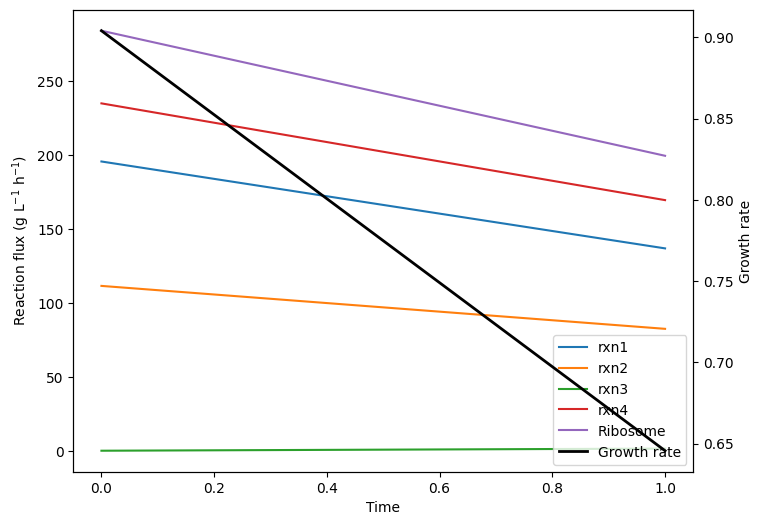

In [6]:
import matplotlib.pyplot as plt

# Clear previous trajectories and set up model
model.clear_all_trajectories()
model.set_f0(model.LP_solution)
model.MC_simulation(condition="1", max_time = 1000, max_iter = 1000, sigma = 0.001, N_e = 100, track = True, saved_values = ['v'], label = 1)

# Extract data
DfluxCon1 = model.MC_tracker[["rxn1.v", "rxn2.v", "rxn3.v", "rxn4.v", "Ribosome.v"]]
time = model.MC_tracker["t"]
growthrate = model.MC_tracker["mu"]

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot reaction fluxes on the primary y-axis (left side)
for column in DfluxCon1:
    label = column.replace('.v', '')  # Remove ".v" from labels
    ax1.plot(time, DfluxCon1[column], label=label)

# Set labels for primary axis (reaction fluxes)
ax1.set_xlabel('Time')
ax1.set_ylabel(r'Reaction flux (g L$^{-1}$ h$^{-1}$)')
#ax1.set_title('Reaction fluxes and Growth rate over time')

# Create a secondary y-axis for growth rate
ax2 = ax1.twinx()
ax2.plot(time, growthrate, label='Growth rate', color='black', linewidth=2)  # Red for growth rate

# Set label for secondary axis (growth rate)
ax2.set_ylabel('Growth rate', color='black')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower right')

#save figure before showing
plt.savefig("MC_Pop_reaction_flux_growthrate_plot.png", dpi=300)
# Display the plot
plt.show()




### EGD P vs Time

> Condition 1: MAXITER reached
> EGD: maximum iterations reached (condition=1,	mu=2.17879,	nb iterations=1000,	nb fixed=789).


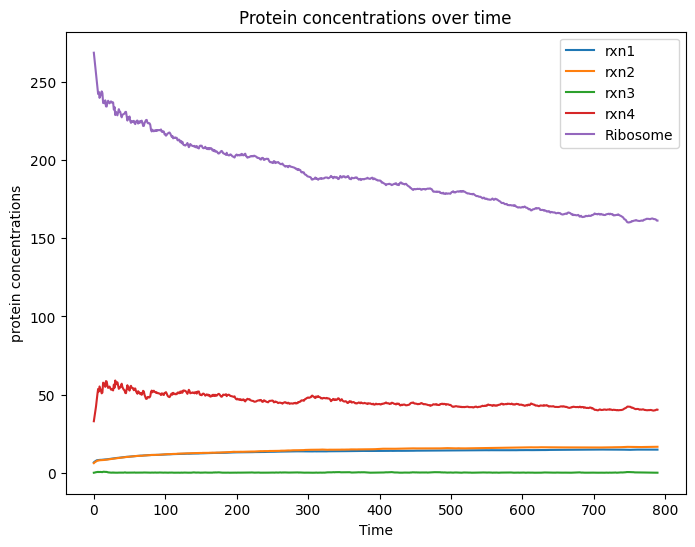

In [10]:
import matplotlib.pyplot as plt
model.clear_all_trajectories()
model.set_f0(model.LP_solution)
model.EGD_simulation(condition="1", max_time = 1000, max_iter = 1000, sigma = 0.0001, N_e = 200, track = True, savedValues = ['p'], label = 1)

# Example data (assuming similar structure for your DataFrame)
DfluxCon1 = model.EGD_tracker[["rxn1.p", "rxn2.p", "rxn3.p", "rxn4.p", "Ribosome.p"]]
time = model.EGD_tracker["t"]  # 'time' as a single series, not a DataFrame

# Create the plot
plt.figure(figsize=(8, 6))

# Plot each reaction flux against time
for column in DfluxCon1:
    label = column.replace('.p', '')
    plt.plot(time, DfluxCon1[column], label=label)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('protein concentrations')
plt.title('Protein concentrations over time')

# Show a legend
plt.legend()

# Display the plot
plt.show()

### EGD C vs Time

> Condition 1: MAXITER reached
> EGD: maximum iterations reached (condition=1,	mu=2.17267,	nb iterations=1000,	nb fixed=793).
[ 14.74753528  47.85212704  41.59381572 235.80652196]


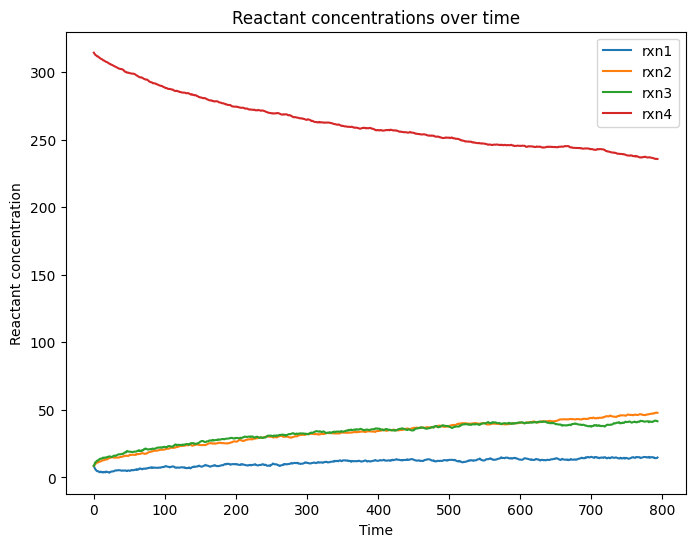

In [11]:
import matplotlib.pyplot as plt
model.clear_all_trajectories()
model.set_f0(model.LP_solution)
model.EGD_simulation(condition="1", max_time = 1000, max_iter = 1000, sigma = 0.0001, N_e = 200, track = True, savedValues = ['c'], label = 1)
print(model.c)
# Example data (assuming similar structure for your DataFrame)
DfluxCon1 = model.EGD_tracker[["rxn1.c", "rxn2.c", "rxn3.c", "rxn4.c"]]
time = model.EGD_tracker["t"]  # 'time' as a single series, not a DataFrame

# Create the plot
plt.figure(figsize=(8, 6))

# Plot each reaction flux against time
for column in DfluxCon1:
    label = column.replace('.c', '')
    plt.plot(time, DfluxCon1[column], label=label)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Reactant concentration')
plt.title('Reactant concentrations over time')

# Show a legend
plt.legend()

# Display the plot
plt.show()